In [1]:
import pandas as pd
import numpy as np

Load the dataset

In [2]:
data = pd.read_csv('HW3data.csv',header=None)

In [3]:
X = data.values[:,1:2001]
y = data.values[:,0]

Data Preprocessing

In [4]:
from sklearn import preprocessing

Scale the data attributes

In [5]:
scaled_X = preprocessing.scale(X)

Normalize the data attributes

In [6]:
normalized_X = preprocessing.normalize(scaled_X)

Standardize the data attributes

In [7]:
standardized_X = preprocessing.scale(normalized_X)

Recursive Feature Elimination method (REF) with crossing validation

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import LinearSVC, SVC

Create the RFE object and compute a cross-validated score.

In [9]:
estimator = LinearSVC()
selector = RFECV(estimator=estimator, cv=StratifiedKFold(3),scoring = 'accuracy')
selector.fit(standardized_X, y)
print("N_features %s" % selector.n_features_)
print("Support is %s" % selector.support_)
print("Ranking %s" % selector.ranking_)
print("Grid Scores %s" % selector.grid_scores_)

N_features 16
Support is [False False False ... False False False]
Ranking [ 792 1936 1401 ...  295  544  325]
Grid Scores [0.66666667 0.69545455 0.68181818 ... 0.56363636 0.56363636 0.56363636]


Plot number of features VS. cross-validation scores

In [10]:
import matplotlib.pyplot as plt

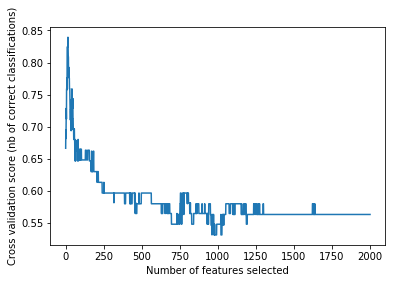

In [11]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

Hold out method

In [12]:
transformed_X = selector.transform(scaled_X)

In [13]:
transformed_X.shape

(62, 16)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = \
    train_test_split(transformed_X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [16]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (49, 16)
Y_train shape:  (49,)
X_test shape:  (13, 16)
Y_test shape:  (13,)


Report the performance

In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=selector,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CV accuracy: 1.000 +/- 0.000
